<a href="https://www.kaggle.com/code/zhukovoleksiy/titanic-with-xgbclassifier?scriptVersionId=121944148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Project using Extreme Gradient Boosting (XGBClassifier)
In this notebook I'm going to try my best to make most accurate solution for Titanic - Machine Learning from Disaster [competition ](https://www.kaggle.com/competitions/titanic) using XGBoosting algoritms.

## Thanks to: 

 1. [notebook](https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling)
 2. [notebook](https://www.kaggle.com/code/kenjee/titanic-project-example)
 3. [notebook](https://www.kaggle.com/code/kevinmorgado/titanic-eda-and-feature-engineering#2.-Input-data---test-and-training-set)

*In some places, I was inspired by your code*

# Table of Contents

1. &nbsp; [Introduction](#1.-Introduction)
2. &nbsp; [Load and Check Data](#2.-Load-and-Check-Data)
3. &nbsp; [Understanding the Shape of Data](#3.-Understanding-the-Shape-of-Data)
4. &nbsp; [Data Cleaning](#4.-Data-Cleaning)
5. &nbsp; [Feature Engineering](#5.-Feature-Engineering)
6. &nbsp; [Data Preprocessing](#6.-Data-Preprocessing)
7. &nbsp; [Basic Model Building](#7.-Basic-Model-Building)
8. &nbsp; [Model Tuning](#8.-Model-Tuning)
8. &nbsp; [Results](#9.-Results)

# 1. Introduction

In [1]:
#Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Load and Check Data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Dictionary:
* **Survived - Survival; 0 = No, 1 = Yes**
* **Psclass - Ticket Class; 1st, 2nd, 3rd**
* **Name - Passenger's Name**
* **Sex - Passenger's Sex**
* **Age - Passenger's Age**
* **SibSp - Number of siblings/spouses aboard the Titanic**
* **Parch - Number of parents/children aboard the Titanic**
* **Ticket - Ticket Number**
* **Fare - Passenger Fare** 
* **Cabin - Cabin Number**
* **Embarked - Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton**

## Data Description

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 3. Understanding the Shape of Data

In [10]:
#split data into numeric and categorical columns
#we don't have so much columns in this dataset, so we can spit them manually
train_data_num = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
train_data_cat = train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

## 3.1 Numerical Data

### Visualize Data

In [11]:
#Select color palette
my_palette = sns.color_palette("ch:start=.1,rot=-.2")
my_palette

[(0.7775330580561233, 0.8761519722608706, 0.9162797679853267),
 (0.6076523006854526, 0.7382276168560334, 0.8359446273115547),
 (0.47122230050256436, 0.5865719480131946, 0.7380301430923379),
 (0.3604731430852954, 0.43331085241378686, 0.6143385846170497),
 (0.2553887516996487, 0.277952143693337, 0.4507977589212959),
 (0.1434884365263325, 0.13317821994968934, 0.249072591235541)]

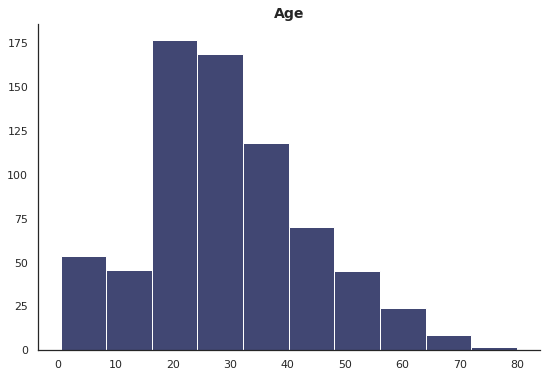

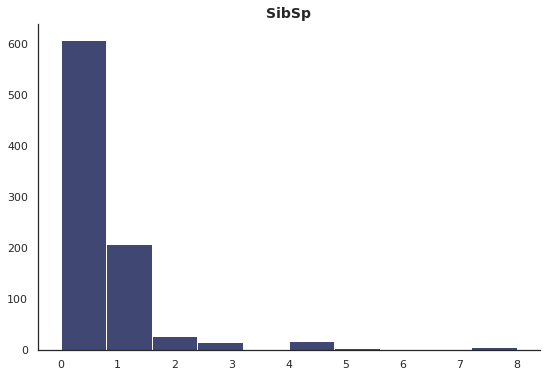

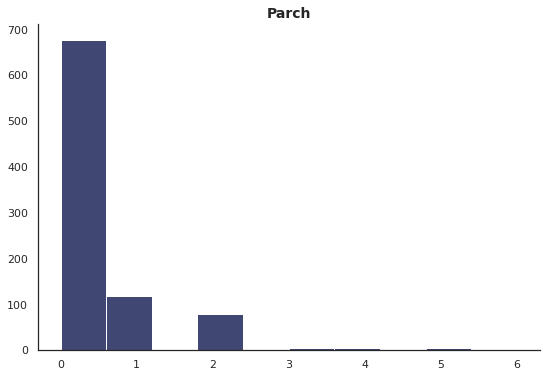

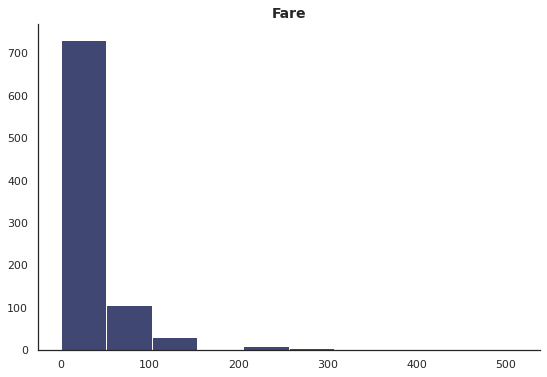

In [12]:
for col in train_data_num.columns:
    sns.set_style('white')
    plt.figure(figsize = (9, 6))
    plt.hist(train_data[col],
             color = my_palette[4])
    plt.title(str(col), fontsize = 14, fontweight = 'bold')
    sns.despine()
    plt.show()

### Pivot Table

In [13]:
def highlight(value):
    if value >= 0.5:
        style = 'background-color: #43d600'
    else:
        style = 'background-color: #FFA5A5'
    return style

In [14]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1

In [15]:
pd.pivot_table(train_data, values='Survived', index=['Family_size']).style.applymap(highlight)

,Survived
Family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [16]:
pd.pivot_table(train_data, index = 'Survived', values = ['Age','Family_size','Fare'])

,Age,Family_size,Fare
Survived,,,
0,30.626179,1.883424,22.117887
1,28.343690,1.938596,48.395408


## 3.2 Categorical Data

### Visualize Data

In [17]:
my_palette = sns.color_palette("ch:start=.1,rot=-.2_r")
my_palette

[(0.1434884365263325, 0.13317821994968934, 0.249072591235541),
 (0.2553887516996487, 0.277952143693337, 0.4507977589212959),
 (0.3604731430852954, 0.43331085241378686, 0.6143385846170497),
 (0.47122230050256436, 0.5865719480131946, 0.7380301430923379),
 (0.6076523006854526, 0.7382276168560334, 0.8359446273115547),
 (0.7775330580561233, 0.8761519722608706, 0.9162797679853267)]

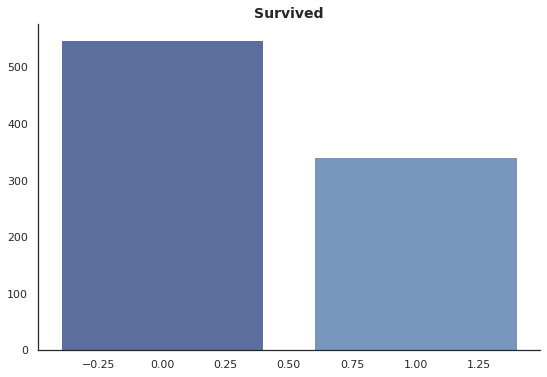

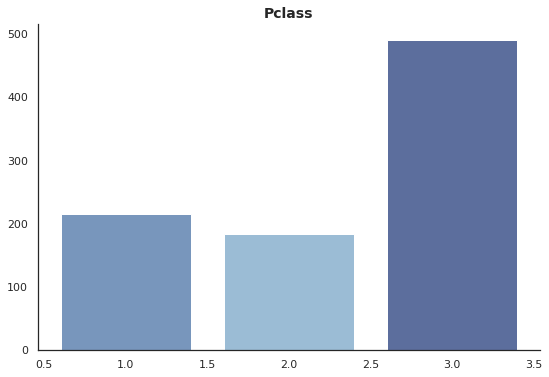

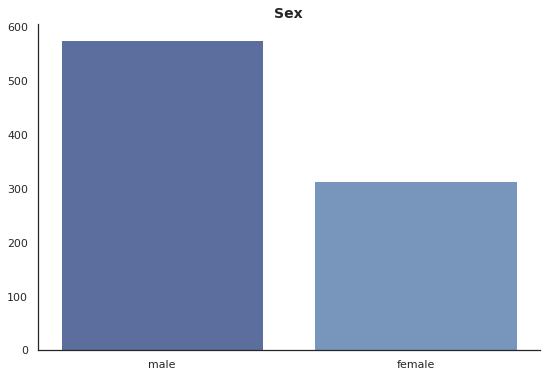

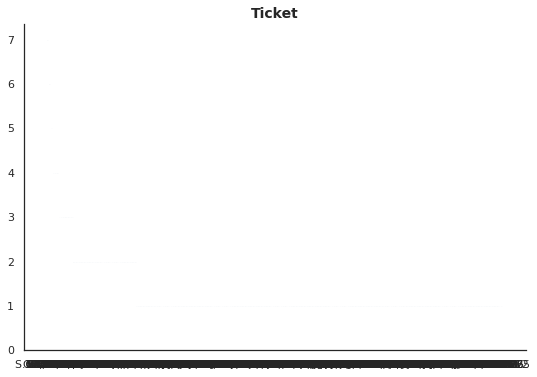

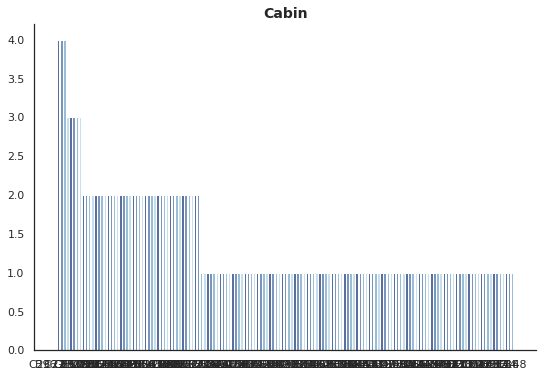

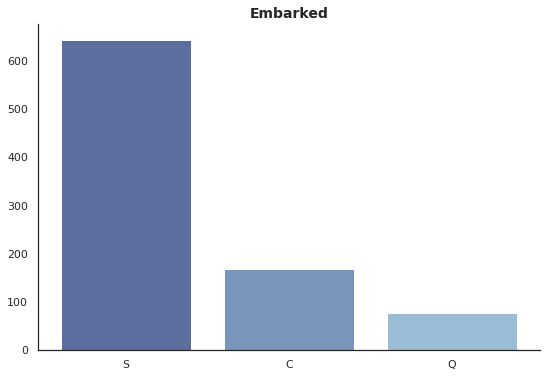

In [18]:
for col in train_data_cat.columns:
    sns.set_style('white')
    plt.figure(figsize = (9, 6))
    plt.bar(train_data[col].value_counts().index,
        train_data[col].value_counts(),
        color = my_palette[2:])
    plt.title(str(col), fontsize = 14, fontweight = 'bold')
    sns.despine()
    plt.show()

#### We can see that there is a problem with visualization of Ticket and Cabin columns

In [19]:
print('Number of unique values in Ticket column: ' + str(len(train_data['Ticket'].unique())))
print('Number of unique values in Cabin column: ' + str(len(train_data['Cabin'].unique())))

Number of unique values in Ticket column: 681
Number of unique values in Cabin column: 148


#### The problem with visualization is caused by a large number of categories into which this data is divided

### Pivot Table

In [20]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women) / len(women)
print('percent of women who survived :', rate_women)

percent of women who survived : 0.7420382165605095


In [21]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("percent of men who survived :", rate_men)

percent of men who survived : 0.18890814558058924


In [22]:
pd.pivot_table(train_data, values='Survived', index=['Sex', 'Pclass']).style.applymap(highlight)

# 4. Data Cleaning

In [23]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [24]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 4.1 Filling Age

#### As we can see, there is a lot of missing values for age column. Since there is subpopulations that have more chance to survive (children for example), it is preferable to keep the age feature and to impute the missing values.

#### I decided to fill missing values with simple median value. 

In [25]:
median_age = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(median_age).astype('int')
print("median age is: ", median_age)

median age is:  28.0


## 4.2 Embarked

In [26]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

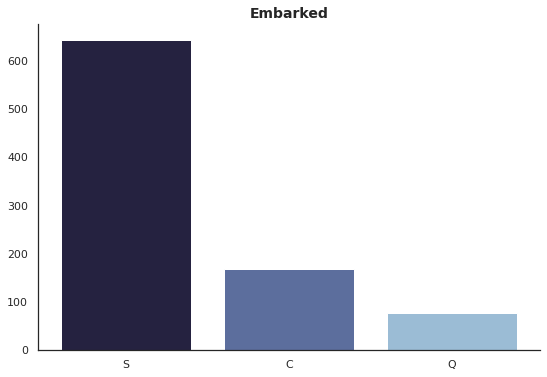

In [27]:
sns.set_style('white')
plt.figure(figsize = (9, 6))
plt.bar(train_data['Embarked'].value_counts().index,
        train_data['Embarked'].value_counts(),
        color = [my_palette[0], my_palette[2], my_palette[4]])
plt.title('Embarked', fontsize = 14, fontweight = 'bold')
sns.despine()
plt.show()

#### I decided to fill missing values frequency

In [28]:
train_data['Embarked'].fillna("S",inplace=True)

# 5. Feature Engineering

## 5.1 Name

#### Name feature contains passenger's title, which may be useful in future model

In [29]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [30]:
# Get Title from Name
train_title = [i.split(",")[1].split(".")[0].strip() for i in train_data["Name"]]
train_data["Title"] = pd.Series(train_title)
train_data["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [31]:
train_data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

#### There is to many titles (17) and most of them are very rare, so we can group them in 4 categories (thank to this  [notebook](https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling) for idea)


In [32]:
# Convert to categorical values Title 
train_data["Title"] = train_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data["Title"] = train_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train_data["Title"] = train_data["Title"].astype(int)

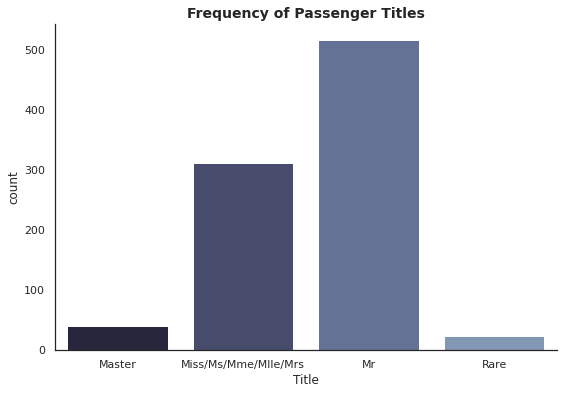

In [33]:
sns.set_style('white')
plt.figure(figsize = (9,6))
pl = sns.countplot(x = train_data["Title"], palette = my_palette)
pl.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])
plt.title("Frequency of Passenger Titles", fontsize = 14, fontweight = 'bold')
sns.despine()
plt.show()

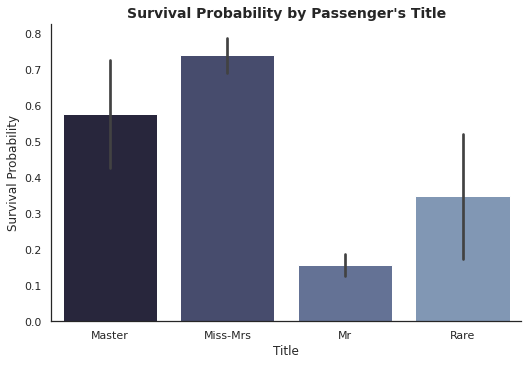

In [34]:
sns.set_style('white')
pl = sns.catplot(x = "Title", y = "Survived",
                    data = train_data, kind="bar",
                    palette = my_palette,
                    aspect=9/6)
pl.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
pl.set_ylabels("Survival Probability")
plt.title("Survival Probability by Passenger's Title", fontsize=14, weight='bold')
sns.despine()

## 5.2 Age

#### I decided to convert passengers age from a numerical to a categorical value

In [35]:
# 0 = Baby, 1 = Kid, 2 = Teen, 3 = Young, 4 = Avg, 5 = Old
train_data['Age'] = train_data['Age'].replace([0, 1, 2, 3], 0)
train_data['Age'] = train_data['Age'].replace([4, 5, 6, 7, 8, 9, 10], 1)
train_data['Age'] = train_data['Age'].replace([11, 12, 13, 14, 15, 16, 17], 2)
train_data['Age'] = train_data['Age'].replace([18, 19, 20, 21, 22, 23, 24, 25], 3)
train_data['Age'] = train_data['Age'].replace([range(26, 40)], 4)
train_data['Age'] = train_data['Age'].replace([range(40, 150)], 5)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,4,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,4,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4,0,0,211536,13.0000,NaN,S,1,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,3,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4,1,2,W./C. 6607,23.4500,NaN,S,4,1
889,890,1,1,"Behr, Mr. Karl Howell",male,4,0,0,111369,30.0000,C148,C,1,2


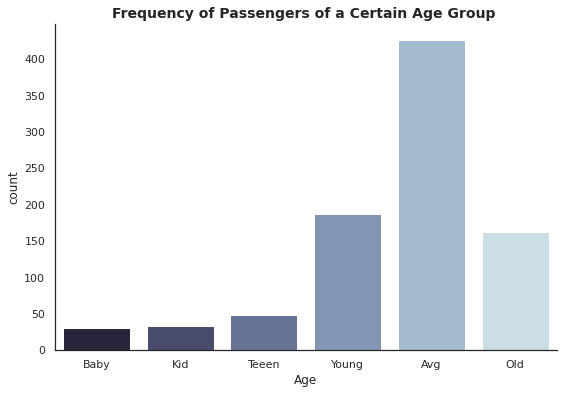

In [36]:
sns.set_style('white')
plt.figure(figsize = (9,6))
pl = sns.countplot(x = train_data["Age"], palette = my_palette)
pl.set_xticklabels(["Baby", "Kid", "Teeen", "Young", "Avg", "Old"])
plt.title("Frequency of Passengers of a Certain Age Group ", fontsize = 14, fontweight = 'bold')
sns.despine()
plt.show()

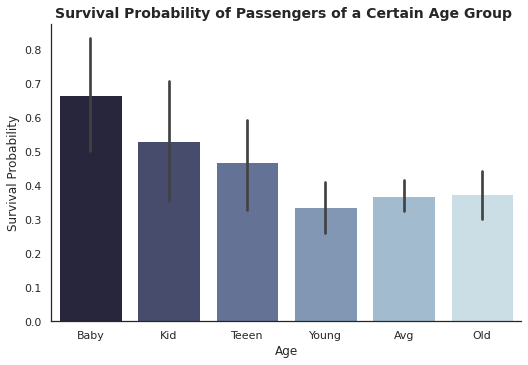

In [37]:
sns.set_style('white')
pl = sns.catplot(x = "Age", y = "Survived",
                    data = train_data, kind="bar",
                    palette = my_palette,
                    aspect=9/6)
pl.set_xticklabels(["Baby", "Kid", "Teeen", "Young", "Avg", "Old"])
pl.set_ylabels("Survival Probability")
plt.title("Survival Probability of Passengers of a Certain Age Group ", fontsize=14, weight='bold')
sns.despine()

#### Most likely, we messed up the data a little, due to the fact that we assigned the median value to passengers with an unspecified age, however, it seems to me that this will not play a critical role in the future model. Perhaps in other versions of the notebook I will change the method of filling Null data in the age column.

## 5.3 Family Size

#### I already used Family Size for pivot table in paragraph&nbsp;3 [Understanding the Shape of Data](#3.-Understanding-the-Shape-of-Data). So here I will use the same code and explane why I'm doing this

#### From our Data Dictionary we know that value SibSp - represents number of siblings/spouses aboard the Titanic, Parch - represents number of parents/children aboard the Titanic, therefore if we add those two values plus 1 (passenger self) we can get Family Size of certan passenger. After that we can transform numeric value into categorical. This feature will impact our model in more clear way. 

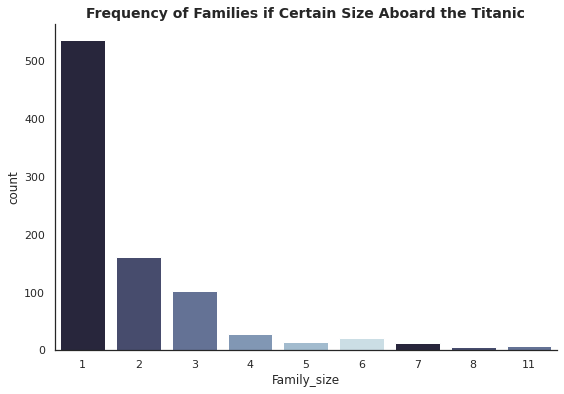

In [38]:
# train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1 -- code I used before, no need to run it again
sns.set_style('white')
plt.figure(figsize = (9,6))
pl = sns.countplot(x = train_data["Family_size"], palette = my_palette)
plt.title("Frequency of Families if Certain Size Aboard the Titanic", fontsize = 14, fontweight = 'bold')
sns.despine()
plt.show()

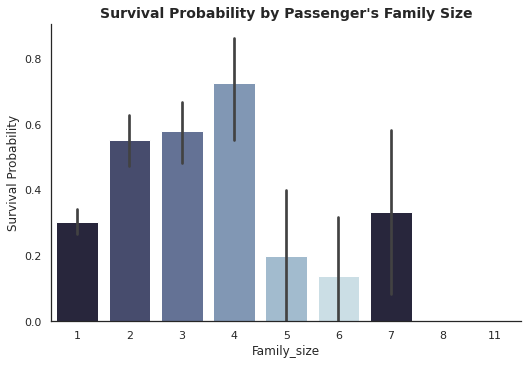

In [39]:
sns.set_style('white')
pl = sns.catplot(x = "Family_size", y = "Survived",
                    data = train_data, kind="bar",
                    palette = my_palette,
                    aspect=9/6)
pl.set_xticklabels()
pl.set_ylabels("Survival Probability")
plt.title("Survival Probability by Passenger's Family Size", fontsize=14, weight='bold')
sns.despine()

#### We can see that Family Size actualy may play a big role in our future model. Let's categorize it now.

In [40]:
# 0 = Single, 1 = Small Family (2 members), 2 = Mediumn Family (3-4 members), 3 = Big Family (5+ members)
train_data['Family_size'] = train_data['Family_size'].replace(1, 0)
train_data['Family_size'] = train_data['Family_size'].replace(2, 1)
train_data['Family_size'] = train_data['Family_size'].replace([3, 4], 2)
train_data['Family_size'] = train_data['Family_size'].replace([range(4, 15)], 3)
train_data['Family_size'].head()

0    1
1    1
2    0
3    1
4    0
Name: Family_size, dtype: int64

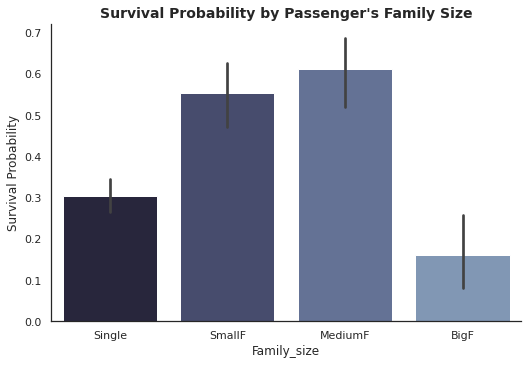

In [41]:
sns.set_style('white')
pl = sns.catplot(x = "Family_size", y = "Survived",
                    data = train_data, kind="bar",
                    palette = my_palette,
                    aspect=9/6)
pl.set_xticklabels(['Single', 'SmallF', 'MediumF', 'BigF'])
pl.set_ylabels("Survival Probability")
plt.title("Survival Probability by Passenger's Family Size", fontsize=14, weight='bold')
sns.despine()

## 5.4 Cabin

In [42]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [43]:
train_data["Cabin"].isnull().sum()

687

#### Cabin Feature contains a lot of missing values. I assume it is caused by the fact, that most of the passengers had no Cabin at all. I want to keep this feature, because cabin can give model information about passengers placement during the disaster.

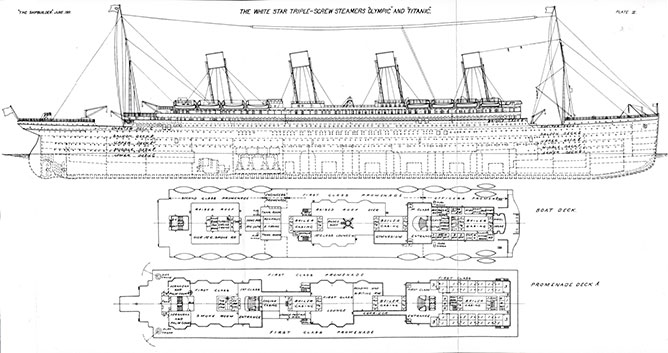

In [44]:
train_data["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

#### With this [article](https://www.ggarchives.com/OceanTravel/Titanic/01-PlanningBuildingLaunching.html#gsc.tab=0) we can understand that first letter of Cabin value is responsible for the name of the deck (A Deck, B Deck, C Deck, etc.). Therefore, I am going to save only first letters.

In [45]:
train_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 0 for i in train_data['Cabin'] ])

In [46]:
train_data = train_data.drop(train_data[train_data["Cabin"] == 'T'].index, axis=0)

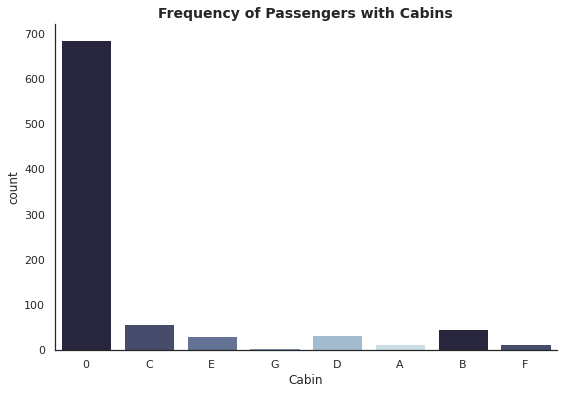

In [47]:
sns.set_style('white')
plt.figure(figsize = (9,6))
pl = sns.countplot(x = train_data["Cabin"],
                   palette = my_palette)
plt.title("Frequency of Passengers with Cabins", fontsize = 14, fontweight = 'bold')
sns.despine()
plt.show()

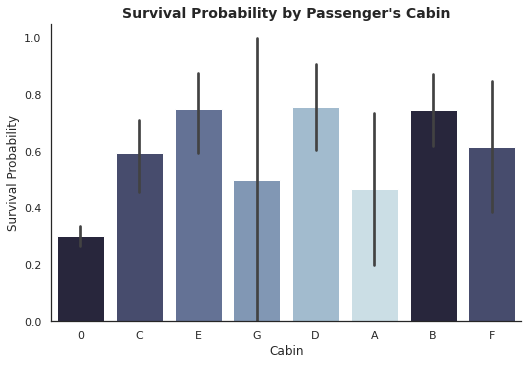

In [48]:
sns.set_style('white')
pl = sns.catplot(x = "Cabin", y = "Survived",
                    data = train_data, kind="bar",
                    palette = my_palette,
                    aspect=9/6)
pl.set_ylabels("Survival Probability")
plt.title("Survival Probability by Passenger's Cabin", fontsize=14, weight='bold')
sns.despine()

#### We can see that passengers with cabins have significantly more chances to survive

# 6. Data Preprocessing

#### In this module, I'm going to basically apply everything that's been covered in the previous modules and present it in a way that makes the module fit better.

In [49]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,3,1,0,A/5 21171,7.2500,0,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,4,1,0,PC 17599,71.2833,C,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,4,0,0,STON/O2. 3101282,7.9250,0,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4,1,0,113803,53.1000,C,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,4,0,0,373450,8.0500,0,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4,0,0,211536,13.0000,0,S,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,3,0,0,112053,30.0000,B,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4,1,2,W./C. 6607,23.4500,0,S,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,4,0,0,111369,30.0000,C,C,0,2


## 6.1 Drop unnecessary features

In [50]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,Title
0,0,3,male,3,7.2500,0,S,1,2
1,1,1,female,4,71.2833,C,C,1,1
2,1,3,female,4,7.9250,0,S,0,1
3,1,1,female,4,53.1000,C,S,1,1
4,0,3,male,4,8.0500,0,S,0,2


## 6.2 Split Data into X and y

In [51]:
y_train = train_data['Survived']
X_train = train_data.drop(['Survived'], axis=1)

#### That is how our train dataset looks like right now:

In [52]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,Title
0,3,male,3,7.2500,0,S,1,2
1,1,female,4,71.2833,C,C,1,1
2,3,female,4,7.9250,0,S,0,1
3,1,female,4,53.1000,C,S,1,1
4,3,male,4,8.0500,0,S,0,2


#### All variables categorical, except Fare

## 6.3 Transform all categorical values into numbers

In [53]:
X_train['Sex'] = X_train['Sex'].replace({'male': 0, 'female': 1})
X_train['Cabin'] = X_train['Cabin'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
X_train['Embarked'] = X_train['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size,Title
0,3,0,3,7.2500,0,0,1,2
1,1,1,4,71.2833,3,1,1,1
2,3,1,4,7.9250,0,0,0,1
3,1,1,4,53.1000,3,0,1,1
4,3,0,4,8.0500,0,0,0,2


## 6.4 OneHotEncoder

In [54]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['Pclass', 'Sex', 'Age', 'Cabin', 'Embarked', 'Family_size', 'Title']]))

OH_train.index = X_train.index

In [55]:
OH_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6.5 Preprocessing test_data

#### Here I'm going to do all the same data preprocessing with test_data

In [56]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
##Filling Nulls:

#Age
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median()).astype('int')

#Fare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median().astype('float'))

##Creating new Features:

#Family_size
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Family_size'] = test_data['Family_size'].replace(1, 0)
test_data['Family_size'] = test_data['Family_size'].replace(2, 1)
test_data['Family_size'] = test_data['Family_size'].replace([3, 4], 2)
test_data['Family_size'] = test_data['Family_size'].replace([range(4, 15)], 3)

#Title
test_title = [i.split(",")[1].split(".")[0].strip() for i in test_data["Name"]]
test_data["Title"] = pd.Series(test_title)
test_data["Title"] = test_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data["Title"] = test_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test_data["Title"] = test_data["Title"].astype(int)

#Age
test_data['Age'] = test_data['Age'].replace([0, 1, 2, 3], 0)
test_data['Age'] = test_data['Age'].replace([4, 5, 6, 7, 8, 9, 10], 1)
test_data['Age'] = test_data['Age'].replace([11, 12, 13, 14, 15, 16, 17], 2)
test_data['Age'] = test_data['Age'].replace([18, 19, 20, 21, 22, 23, 24, 25], 3)
test_data['Age'] = test_data['Age'].replace([range(26, 40)], 4)
test_data['Age'] = test_data['Age'].replace([range(40, 150)], 5)

#Cabin
test_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 0 for i in test_data['Cabin']])

##Transform all categorical values into numbers:

#Sex
test_data['Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})

#Cabin
test_data['Cabin'] = test_data['Cabin'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

#Embarked
test_data['Embarked'] = test_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

##Save PassengerId

test_id = test_data['PassengerId']

##Drop unnecessary features

test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

##OneHotEncoding

OH_test = pd.DataFrame(OH_encoder.transform(test_data[['Pclass', 'Sex', 'Age', 'Cabin', 'Embarked', 'Family_size', 'Title']]))

OH_test.index = test_data.index


#### Here is a result:

In [58]:
OH_test.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# 7. Basic Model Building

In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

my_model = XGBClassifier()
cv = cross_val_score(my_model, OH_train ,y_train, cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.78651685 0.82022472 0.80337079 0.83146067]
0.8067415730337079


# 8. Model Tuning

#### I am completely new to this. This notebook is basically my first time using XGBoosting and GridSearchCV. So the code below is far from the best possible, and maybe in the future I will change it.

In [60]:
# Gradient boosting tunning
from sklearn.model_selection import GridSearchCV 

my_model = XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 325, 350],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6, 7]
}


gsXGB = GridSearchCV(my_model, param_grid = xgb_param_grid, cv=5, n_jobs= 4, verbose = 1)

gsXGB.fit(OH_train,y_train)

XGB_best = gsXGB.best_estimator_

# Best score
gsXGB.best_score_

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


0.8382022471910112

# 9. Results

#### Make and Submit Predictions

In [61]:
# Prediction of target for test data
predicts = XGB_best.predict(OH_test).astype(int)

In [62]:
# Saving the result into submission file
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission["Survived"] = predicts
submission.to_csv('submission.csv', index=False)  #Competition rules require that no index number be saved

*If you found this notebook useful just upvote it :)*